In [7]:
# Importing libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import tensorflow as tf

## Configure Session

This code snippet sets allow_growth in config.gpu_options to True, 
which allows the TensorFlow GPU memory allocation to grow as needed. 
The tf.Session() function is then called using the config object to create a session that uses the specified configuration.

In [8]:
# config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth = True
# sess = tf.compat.v1.Session(config=config)
# Assume that you have 12GB of GPU memory and want to allocate ~4GB:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=1)
sess =  tf.compat.v1.Session(config= tf.compat.v1.ConfigProto(gpu_options=gpu_options))


## Building My Model

In [9]:
class Cat_Dog_Classifier(tf.keras.Model) :
    def __init__(self) :
        super(Cat_Dog_Classifier,self).__init__() 
        #initiliser Layers et autres objets dans methode __init__ 
    
        self.conv1 = Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu')
        self.mp1 = MaxPooling2D(pool_size = (2, 2))
        self.drop1 = Dropout(0.2)
        self.conv2 = Conv2D(32, (3, 3), activation = 'relu')
        self.mp2= MaxPooling2D(pool_size = (2, 2))
        self.drop2 = Dropout(0.2)
        self.conv3 = Conv2D(32, (3, 3), activation = 'leaky_relu')
        self.mp3= MaxPooling2D(pool_size = (2, 2))
        self.drop3 = Dropout(0.2)
        
        self.flatten = Flatten()
        
        # Step 4 - Full connection
        self.layer1 = Dense(units = 128, activation = 'relu')
        self.layer2 = Dense(units = 1, activation = 'sigmoid')
        
        
        
    def call(self , inputs ,training = True) : 
        #initiliser Layers et autres objets dans methode call
        x = self.conv1(inputs)
        x = self.mp1(x)
        x = self.drop1(x)
        
        x = self.conv2(x)
        x = self.mp2(x)
        x = self.drop2(x)
        
        x = self.conv3(x)
        x = self.mp3(x)
        x = self.drop3(x)
        
        x = self.flatten(x)
        
        x = self.layer1(x)
        y = self.layer2(x)
        
        return  y
    
    

## Data Processing and Data Augmentation

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,  # normalize pixel values to range [0,1]
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                    rotation_range=45,  # randomly rotate the image by up to 45 degrees
                                   horizontal_flip = True )  # randomly flip images horizontally
                                    #on peut utiliser vertical_flip mais c'est unecissaire car on ne peut pas trouver un chat ou chien dans cette position 
    
test_datagen = ImageDataGenerator(rescale = 1./255)  # normalize pixel values to range [0,1]



#importer les image rapidement d'un dossier et appliquer data augmentation process

training_set = train_datagen.flow_from_directory('/kaggle/input/tp3dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/kaggle/input/tp3dataset/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Train model

In [12]:
model = Cat_Dog_Classifier()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(  
                 training_set,
#                  steps_per_epoch = 320,
                 epochs = 100,
                 validation_data = test_set,
#                  validation_steps = 80
)

Epoch 1/100


2023-03-22 21:50:04.965283: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape incat__dog__classifier_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


250/250 [==============================] - 105s 404ms/step - loss: 0.6911 - accuracy: 0.5284 - val_loss: 0.6700 - val_accuracy: 0.5470
Epoch 2/100
250/250 [==============================] - 39s 156ms/step - loss: 0.6454 - accuracy: 0.6250 - val_loss: 0.6060 - val_accuracy: 0.6865
Epoch 3/100
250/250 [==============================] - 38s 153ms/step - loss: 0.6193 - accuracy: 0.6547 - val_loss: 0.5797 - val_accuracy: 0.7080
Epoch 4/100
250/250 [==============================] - 38s 153ms/step - loss: 0.5866 - accuracy: 0.6874 - val_loss: 0.5725 - val_accuracy: 0.7135
Epoch 5/100
250/250 [==============================] - 39s 156ms/step - loss: 0.5698 - accuracy: 0.6946 - val_loss: 0.5378 - val_accuracy: 0.7310
Epoch 6/100
250/250 [==============================] - 40s 159ms/step - loss: 0.5657 - accuracy: 0.7050 - val_loss: 0.5292 - val_accuracy: 0.7420
Epoch 7/100
250/250 [==============================] - 39s 156ms/step - loss: 0.5479 - accuracy: 0.7119 - val_loss: 0.5186 - val_accura

## Visualize Model Performance

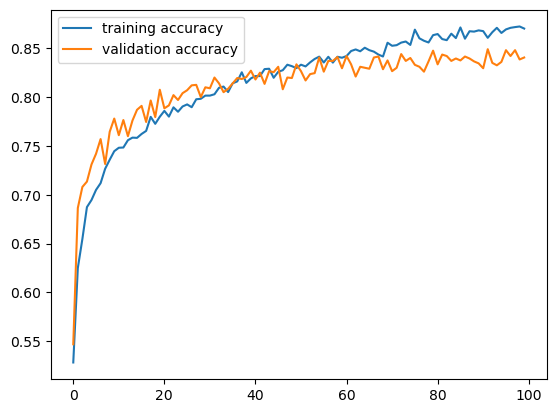

In [13]:
import matplotlib.pyplot as plt
plt.plot(model.history.history["accuracy"], label="training accuracy")
plt.plot(model.history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

## Partie 3 - Prédictions

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/kaggle/input/tp3dataset/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 144ms/step
dog


## After 100 epochs , the model is starting to overfit on peut utiliser ResNet